# Iris Flower Classification

$Equipo: Daniel Navarro Hernandez, Iñaki Sebastián Orozco García$

#### Video explicativo: 

In [73]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

Obtenemos la información con respecto a las flores de Iris

In [74]:
iris_data = pd.read_csv("./data/iris.csv")
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Hacemos una visualización de como están repartidos los datos en base a la especie de la flor, se puede observar que la información sobre los pétalos es bastante más facil de agrupar y diferenciar que la de los sépalos, dónde los datos de las especies se ven algo más revueltos entre si.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

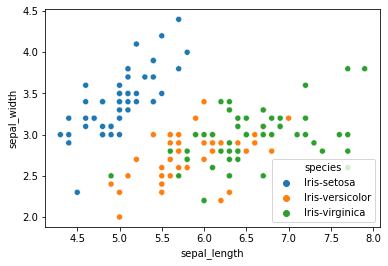

In [75]:
sns.scatterplot(x=iris_data["sepal_length"], y=iris_data["sepal_width"], hue=iris_data.species)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

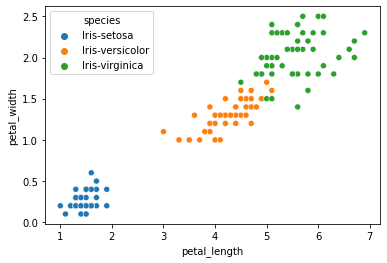

In [76]:
sns.scatterplot(x=iris_data.petal_length, y=iris_data.petal_width, hue=iris_data.species)

Particionamos la información en 3 set de entrenamiento y prueba con las proporciones 70-30, 50-50, 30-70 (entrenamiento-prueba)

In [77]:
Xdata = iris_data.drop("species", axis=1)
ydata = iris_data.species
X1_train, X1_test, y1_train, y1_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(Xdata, ydata, test_size=0.5, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(Xdata, ydata, test_size=0.7, random_state = 1)

In [78]:
LR_model1 = LogisticRegression(solver="newton-cg", random_state=42).fit(X1_train, y1_train) #por defecto el penalty es L2
LR_model2 = LogisticRegression(solver="newton-cg", random_state=42).fit(X2_train, y2_train) #el solver lbfgs me da error en python
LR_model3 = LogisticRegression(solver="newton-cg", random_state=42).fit(X3_train, y3_train)

In [79]:
y1_predict = LR_model1.predict(X1_test)
y2_predict = LR_model2.predict(X2_test)
y3_predict = LR_model3.predict(X3_test)

In [80]:
print(
"Repartiendo 70-30: ", LR_model1.score(X1_test, y1_test), "\n"
"Repartiendo 50-50: ",LR_model2.score(X2_test, y2_test), "\n"
"Repartiendo 30-70: ",LR_model3.score(X3_test, y3_test), "\n"
)

Repartiendo 70-30:  0.9777777777777777 
Repartiendo 50-50:  0.9733333333333334 
Repartiendo 30-70:  0.9714285714285714 



Los mejores resultados para el modelo de regresión lineal se dieron con la repartición 70-30, pero en realidad la diferencia es mínima, cualquiera de los tres modelos nos regresa resultados bastante buenos. como se ve abajo solo se tuvo un error al momento de clasificar un tipo de flor, excelentes resultados.

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, y1_predict)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

## Intentando modelos con un solo predictor

In [82]:
X1 = iris_data.sepal_length.to_numpy().reshape(-1, 1)
X2 = iris_data.sepal_width.to_numpy().reshape(-1, 1)
X3 = iris_data.petal_length.to_numpy().reshape(-1, 1)
X4 = iris_data.petal_width.to_numpy().reshape(-1, 1)
y = iris_data.species

Al ser la repartición 70-30 la que mejor resultado nos arrojo, será la que utilizaremos en los siguientes modelos.

In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.3, random_state = 1)

In [84]:
LR_model1 = LogisticRegression(solver="newton-cg", random_state=42).fit(X1_train, y1_train) #por defecto el penalty es L2
LR_model2 = LogisticRegression(solver="newton-cg", random_state=42).fit(X2_train, y2_train)
LR_model3 = LogisticRegression(solver="newton-cg", random_state=42).fit(X3_train, y3_train)
LR_model4 = LogisticRegression(solver="newton-cg", random_state=42).fit(X4_train, y4_train)

In [85]:
print(
" with predictor sepal_length: ",LR_model1.score(X1_test, y1_test), "\n",
"with predictor sepal_width:  ",LR_model2.score(X2_test, y2_test), "\n",
"with predictor petal_length: ",LR_model3.score(X3_test, y3_test), "\n",
"with predictor petal_width:  ",LR_model4.score(X4_test, y4_test), "\n" 
)

 with predictor sepal_length:  0.6888888888888889 
 with predictor sepal_width:   0.6222222222222222 
 with predictor petal_length:  0.9777777777777777 
 with predictor petal_width:   0.9333333333333333 



Como se puede observar el mejor modelo sin duda fue el que toma la longitud del pétalo, seguido del predictor de su ancho. Se puede concluir que los datos más importantes para tener buenos resultados en el modelo es la información sobre el pétalo, como ya se vió en las graficas anteriores la información del pétalo es la más fácil de distinguir para el modelo ya que es la que se encuentra en grupos más fácil de identificar y con poca sobreposición uno sobre otro.

## Modelos variando el número de predictores

In [86]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
X1 = iris_data.drop(["species", "petal_length", "petal_width"],axis=1)
X2 = iris_data.drop(["species", "sepal_length", "sepal_width"],axis=1)
X3 = iris_data.drop(["species", "sepal_length", "petal_width"],axis=1)
X4 = iris_data.drop(["species", "petal_length", "sepal_width"],axis=1)
X5 = iris_data.drop(["species", "petal_length"],axis=1)
X6 = iris_data.drop(["species", "sepal_length"],axis=1)
X7 = iris_data.drop(["species", "petal_width"],axis=1)
X8 = iris_data.drop(["species", "sepal_width"],axis=1)
X9 = iris_data.drop(["species"],axis=1)
y = iris_data.species

In [88]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.3, random_state = 1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.3, random_state = 1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.3, random_state = 1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.3, random_state = 1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y, test_size=0.3, random_state = 1)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y, test_size=0.3, random_state = 1)

In [89]:
m1 = LogisticRegression(solver="newton-cg", random_state=42).fit(X1_train, y1_train) 
m2 = LogisticRegression(solver="newton-cg", random_state=42).fit(X2_train, y2_train)
m3 = LogisticRegression(solver="newton-cg", random_state=42).fit(X3_train, y3_train)
m4 = LogisticRegression(solver="newton-cg", random_state=42).fit(X4_train, y4_train)
m5 = LogisticRegression(solver="newton-cg", random_state=42).fit(X5_train, y5_train)
m6 = LogisticRegression(solver="newton-cg", random_state=42).fit(X6_train, y6_train)
m7 = LogisticRegression(solver="newton-cg", random_state=42).fit(X7_train, y7_train)
m8 = LogisticRegression(solver="newton-cg", random_state=42).fit(X8_train, y8_train)
m9 = LogisticRegression(solver="newton-cg", random_state=42).fit(X9_train, y9_train)

In [90]:
print(
" with predictor sepal_length and sepal_width: ",m1.score(X1_test, y1_test), "\n",
"with predictor petal_length and petal_width:  ", m2.score(X2_test, y2_test), "\n",
"with predictor petal_length and sepal_width: ", m3.score(X3_test, y3_test), "\n",
"with predictor sepal_length and petal_width:  ", m4.score(X4_test, y4_test), "\n" 
"with predictor sepal_length, sepal_width and petal_width:  ", m5.score(X5_test, y5_test), "\n" 
"with predictor petal_length, sepal_width and petal_width:  ", m6.score(X6_test, y6_test), "\n" 
"with predictor sepal_length, sepal_width and petal_length:  ", m7.score(X7_test, y7_test), "\n"
"with predictor sepal_length, petal_width and petal_length:  ", m8.score(X8_test, y8_test), "\n"
"with predictor sepal_length, sepal_width, petal_width and petal_length:  ", m9.score(X9_test, y9_test), "\n"
)

 with predictor sepal_length and sepal_width:  0.7555555555555555 
 with predictor petal_length and petal_width:   0.9777777777777777 
 with predictor petal_length and sepal_width:  0.9777777777777777 
 with predictor sepal_length and petal_width:   0.9333333333333333 
with predictor sepal_length, sepal_width and petal_width:   0.9333333333333333 
with predictor petal_length, sepal_width and petal_width:   0.9555555555555556 
with predictor sepal_length, sepal_width and petal_length:   0.9777777777777777 
with predictor sepal_length, petal_width and petal_length:   0.9777777777777777 
with predictor sepal_length, sepal_width, petal_width and petal_length:   0.9777777777777777 



Podemos ver que ya con los predictores de el largo y ancho de pétalo o el largo del pétalo y el ancho del sépalo podemos obtener los mejores resultados, al usar además una variable más o dos variables más podemos obtener menos resultados positivos o el mismo porcentaje.

In [91]:
Xdata = iris_data.drop("species", axis=1)
ydata = iris_data.species
X1_train, X1_test, y1_train, y1_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(Xdata, ydata, test_size=0.5, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(Xdata, ydata, test_size=0.7, random_state = 1)

In [92]:
LR_model1 = LogisticRegression(solver="liblinear", random_state=42, penalty = 'l1').fit(X1_train, y1_train) 
LR_model2 = LogisticRegression(solver="liblinear", random_state=42, penalty = 'l2').fit(X2_train, y2_train) 
LR_model3 = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', l1_ratio = 0.5).fit(X3_train, y3_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [93]:
y1_predict = LR_model1.predict(X1_test)
y2_predict = LR_model2.predict(X2_test)
y3_predict = LR_model3.predict(X3_test)

In [94]:
print(
"Con penalty de l1: (lasso)", LR_model1.score(X1_test, y1_test), "\n"
"Con penalty de l2: (ridge)",LR_model2.score(X2_test, y2_test), "\n"
"Con penalty de elasticnet (combinación de l1 y l2): ",LR_model3.score(X3_test, y3_test), "\n"
)

Con penalty de l1: (lasso) 0.9333333333333333 
Con penalty de l2: (ridge) 0.92 
Con penalty de elasticnet (combinación de l1 y l2):  0.9714285714285714 



Los mejores resultados pueden darse cuando se usa elasticnet con l1_ratio de 0.5, esta es la combinación de l1 y l2.

# Bouquet Flower Classification

Tipos de flores:
1. Daffodil 
2. Snowdrop 
3. Lily Valley 
4. Bluebell
5. Crocus
6. Iris
7. Tigerlily
8. Tulip
9. Firitillary
10. Sunflower

In [95]:
labels = []
for a in range(1, 11):
    for b in range(1, 81):
        labels.append(a)
len(labels)

800

Movemos el 20% de las muestras a otra carpeta para prueba.

In [49]:
import shutil
destination = "./data/20"
for x in range(0, 10):
    for y in range(1, 81):
        if(y>= 1 and y<= 16):
            if ((y+(x*80))<10):
                source = "./data/10flowers/image_000"+str(y+(x*80))+".jpg"
                shutil.move(source, destination)
            elif((y+(x*80))<100):
                source = "./data/10flowers/image_00"+str(y+(x*80))+".jpg"
                shutil.move(source, destination)
            else:
                source = "./data/10flowers/image_0"+str(y+(x*80))+".jpg"
                shutil.move(source, destination)

Error: Destination path './data/20\image_0001.jpg' already exists

In [96]:
labels_test = []
for x in range(0, 10):
    for y in range(0, 16):
        labels_test.append(labels.pop(y+(x*64)))

In [98]:
print(len(labels), len(labels_test))

640 160


Tipos de flores:
1. Daffodil 
2. Snowdrop 
3. Lily Valley 
4. Bluebell
5. Crocus
6. Iris
7. Tigerlily
8. Tulip
9. Firitillary
10. Sunflower

Obtenemos los datos ya repartidos

In [140]:
train_data = pd.read_csv("./data/80.csv")
train_data = train_data.drop([0, 1])
train_data = train_data.drop(['image name', 'image', 'size', 'width', 'height'], axis=1)
train_data = train_data.astype('float64')
X_train = train_data

Elimnamos las filas y columnas que no se necesitan en nuestro modelo

In [101]:
test_data =  pd.read_csv("./data/20.csv")
test_data = test_data.drop([0, 1])
test_data = test_data.drop(['image name', 'image', 'size', 'width', 'height'], axis=1)
X_test = test_data

## Creación y entrenamiento de modelos

### Logistic Regression

In [102]:
LR_model1 = LogisticRegression(solver="newton-cg", tol=0.001, C=.5, max_iter=400,random_state=42).fit(X_train, labels)

In [103]:
LR_model2 = LogisticRegression(solver="newton-cg", tol=0.0001, C=.8, max_iter=500,random_state=42).fit(X_train, labels)

In [104]:
LR_model1.score(X_test, labels_test)

0.96875

In [105]:
LR_model2.score(X_test,labels_test)

0.96875

In [109]:
LR1_predict = LR_model1.predict(X_test)
LR2_predict = LR_model1.predict(X_test)

In [110]:
confusion_matrix(labels_test, LR1_predict)

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

In [111]:
confusion_matrix(labels_test, LR2_predict)

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

### Neural Networks

In [112]:
MLP_model1 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(50, 22), random_state=1, max_iter=400).fit(X_train, labels)

In [113]:
MLP_model2 = MLPClassifier(alpha=1e-4, hidden_layer_sizes=(180, 60), random_state=1, max_iter=400).fit(X_train, labels)

In [114]:
MLP_model1.score(X_test, labels_test)

0.96875

In [115]:
MLP_model2.score(X_test, labels_test)

0.975

In [116]:
MLP1_predict = MLP_model1.predict(X_test)
MLP2_predict = MLP_model1.predict(X_test)

In [117]:
confusion_matrix(labels_test, MLP1_predict)

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

In [118]:
confusion_matrix(labels_test, MLP2_predict)

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

### Support Vector Machines

In [119]:
SVM_model1 = svm.SVC(C=5, tol=1e-4).fit(X_train, labels)

In [120]:
SVM_model2 = svm.SVC(C=.002, kernel="rbf", tol=1e-4).fit(X_train, labels)

In [121]:
SVM_model1.score(X_test, labels_test)

0.9625

In [122]:
SVM_model2.score(X_test, labels_test)

0.86875

In [123]:
SVM1_predict = SVM_model1.predict(X_test)
SVM2_predict = SVM_model1.predict(X_test)

In [124]:
confusion_matrix(labels_test, SVM1_predict)

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

In [125]:
confusion_matrix(labels_test, SVM2_predict)

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

### Random Forests

In [126]:
RF_model1 = RandomForestClassifier(n_estimators=80, max_depth=50, max_features="sqrt").fit(X_train, labels)

In [127]:
RF_model2 = RandomForestClassifier(n_estimators=130, min_impurity_decrease=1e-3).fit(X_train, labels)

In [136]:
RF_model1.score(X_test, labels_test)

0.88125

In [129]:
RF_model2.score(X_test, labels_test)

0.9

In [130]:
RF1_predict = RF_model1.predict(X_test)
RF2_predict = RF_model1.predict(X_test)

In [131]:
confusion_matrix(labels_test, RF1_predict)

array([[13,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  5, 10,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  2,  0,  0,  0],
       [ 1,  0,  0,  1, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

In [132]:
confusion_matrix(labels_test, RF2_predict)

array([[13,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  5, 10,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  2,  0,  0,  0],
       [ 1,  0,  0,  1, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

## Análisis de resultados

#### Las flores más fáciles y difícles de identificar
Las flores con mejores resultados fueron: la Iris(6), Tigerlily(7), Firitillary(9), Sunflower(10), teniendo en los modelos con mejores resultados hasta un 100% de accuracy en las predicciones hechas por los modelos y con resultados bastante parecidos según observamos en la matriz de confusion. Por otra parte la flor más difícil de clasificar fue la lily valley(3) y detrás de esta la Tulip(8), ambas fueron muy difícil de indentificar para el modelo de random forests.


#### Mejor modelo

El mejor modelo sin lugar a dudas fue el de logistic regression, logrando con nosotros hasta un .975 de score y viendo la matriz de confusión apenas y cometió equivocaciones, aunque estos resultados son bastante buenos, creemos que es posible crear un modelo con mejores resultados, ajustando un poco más los parametros o tal vez con más información que alimentar al modelo. 


#### Set de entrenamiento y set de pruebas

Como los modelos se crearon en base al set de entrenamiento, siempre van a tener el 100% de accuracy en estos datos, en cambio al probar con datos nuevos en el set de pruebas los resultados varían dependiendo de que tan bueno es el modelo para adaptarse a la problemática que se busca resolver.